In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png',cv.IMREAD_GRAYSCALE)
img1= img/255

gamma=0.5
a=img1**gamma

cv.imshow('Gamma 0.5 image', a)
cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png',cv.IMREAD_GRAYSCALE)
img1= img/255

gamma=2
a=img1**gamma

cv.imshow('Gamma 2 image', a)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png',cv.IMREAD_GRAYSCALE)
img1= img/255

r1, r2 = 0.2, 0.8
output = np.zeros_like(img1)

output[img1 >= r1] = 0
output[(img1 >= r1) & (img1 <= r2)] = \
    (img1[(img1 >= r1) & (img1 <= r2)]-r1)/(r2-r1)
output[img1 > r2] = 1

output1 = np.uint8(output*255)

cv.imshow('Resulting Image',output1)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
#Question 02 Part a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\highlights_and_shadows.jpg')
lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,a,b = cv.split(lab)

gamma = 0.6
L_norm = L/255
L_gamma = np.power(L_norm,gamma)
L_gamma = np.uint8(L_gamma*255)

lab_out = cv.merge((L_gamma, a,b))
out = cv.cvtColor(lab_out, cv.COLOR_LAB2BGR)

cv.imshow('output', out)
cv.waitKey(0)
cv.destroyAllWindows()

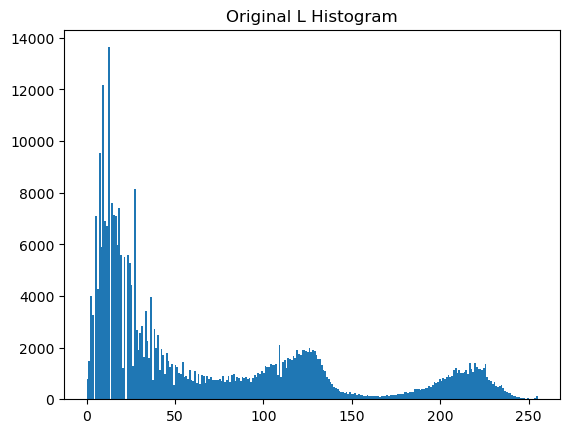

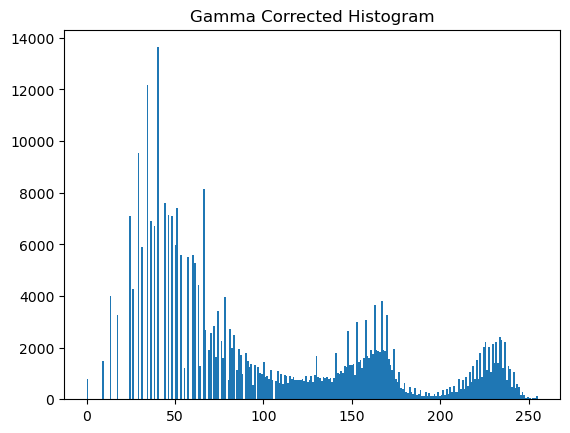

In [7]:
#Question 02 Part b
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

plt.hist(L.flatten(),256)
plt.title('Original L Histogram')
plt.show()

plt.hist(L_gamma.flatten(),256)
plt.title('Gamma Corrected Histogram')
plt.show()

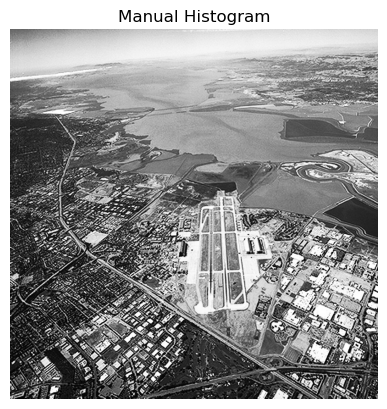

In [10]:
#Question 3 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png',cv.IMREAD_GRAYSCALE)

hist, _ = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf = cdf / cdf[-1]
out = np.interp(img.flatten(), range(256), cdf*255)
out = out.reshape(img.shape).astype(np.uint8)

plt.imshow(out, cmap='gray')
plt.title('Manual Histogram')
plt.axis('off')
plt.show()

In [19]:
#Question 04
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\looking_out.jpg',cv.IMREAD_GRAYSCALE)

cv.imshow('Gray Image',img)
cv.waitKey(0)
cv.destroyAllWindows()

Otsu Threshold = 101.0


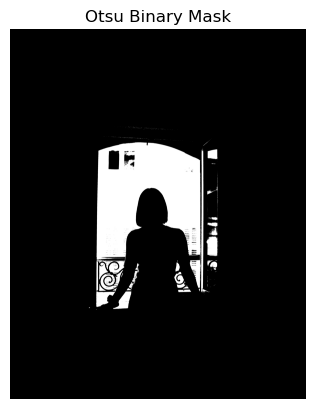

In [21]:
#Question 04 part a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\looking_out.jpg',cv.IMREAD_GRAYSCALE)

th, mask = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print('Otsu Threshold =', th)

plt.imshow(mask, cmap='gray')
plt.title('Otsu Binary Mask')
plt.axis('off')
plt.show()

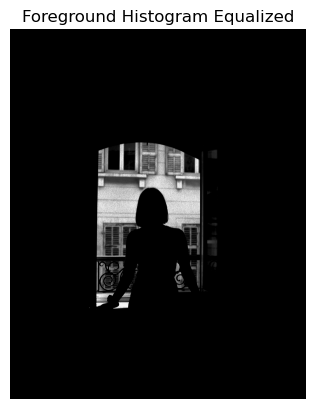

In [26]:
#Question 04 part b
import numpy as np
import matplotlib.pyplot as plt

fg = cv.bitwise_and(gray, gray, mask=mask)

hist, _ = np.histogram(fg.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf = cdf / cdf[-1]
out = np.interp(fg.flatten(), range(256), cdf*255)
out = out.reshape(fg.shape).astype(np.uint8)

plt.imshow(out, cmap='gray')
plt.title('Foreground Histogram Equalized')
plt.axis('off')
plt.show()

In [25]:
#Question 05 part a
import numpy as np

sigma = 2
ax = np.arange(-2, 3)
x, y = np.meshgrid(ax, ax)
kernel = np.exp(-(x**2 + y**2) / (2*sigma**2))
kernel = kernel / kernel.sum()

print(kernel)

[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

ax = np